# Customer Analysis Case Study - EDA

## Activity-3
- Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
Use seaborn library to construct distribution plots for the numerical variables
Use Matplotlib to construct histograms
Do the distributions for different numerical variables look like a normal distribution
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- Optional: Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

pd.options.display.max_rows = 100

In [30]:
df= pd.read_csv('/Users/esrabecker/Desktop/IH_RH_DA_FT_AUG_2022/Class_Materials/Case_Studies/Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv')
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


## Getting numerical and catagorical data

For this part let's divide our data into two parts, which are numerical and catagorical so later we can check the distrubition based on the numerical data. Also categorical data here can show us which group is more likely to be our target group.

In [31]:
#Table of numerical data
numerical = df.select_dtypes(include=np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [28]:
#Table of categorical data
categorical = df.select_dtypes(include=np.object)
categorical

/var/folders/c3/pkgzz_891b148813l5gzlgl40000gn/T/ipykernel_82602/2844959617.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = df.select_dtypes(include=np.object)


,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


## Distrubition of numerical data 

Here we can see the distrubition of numerical data and the ones which are more likely to correlated.

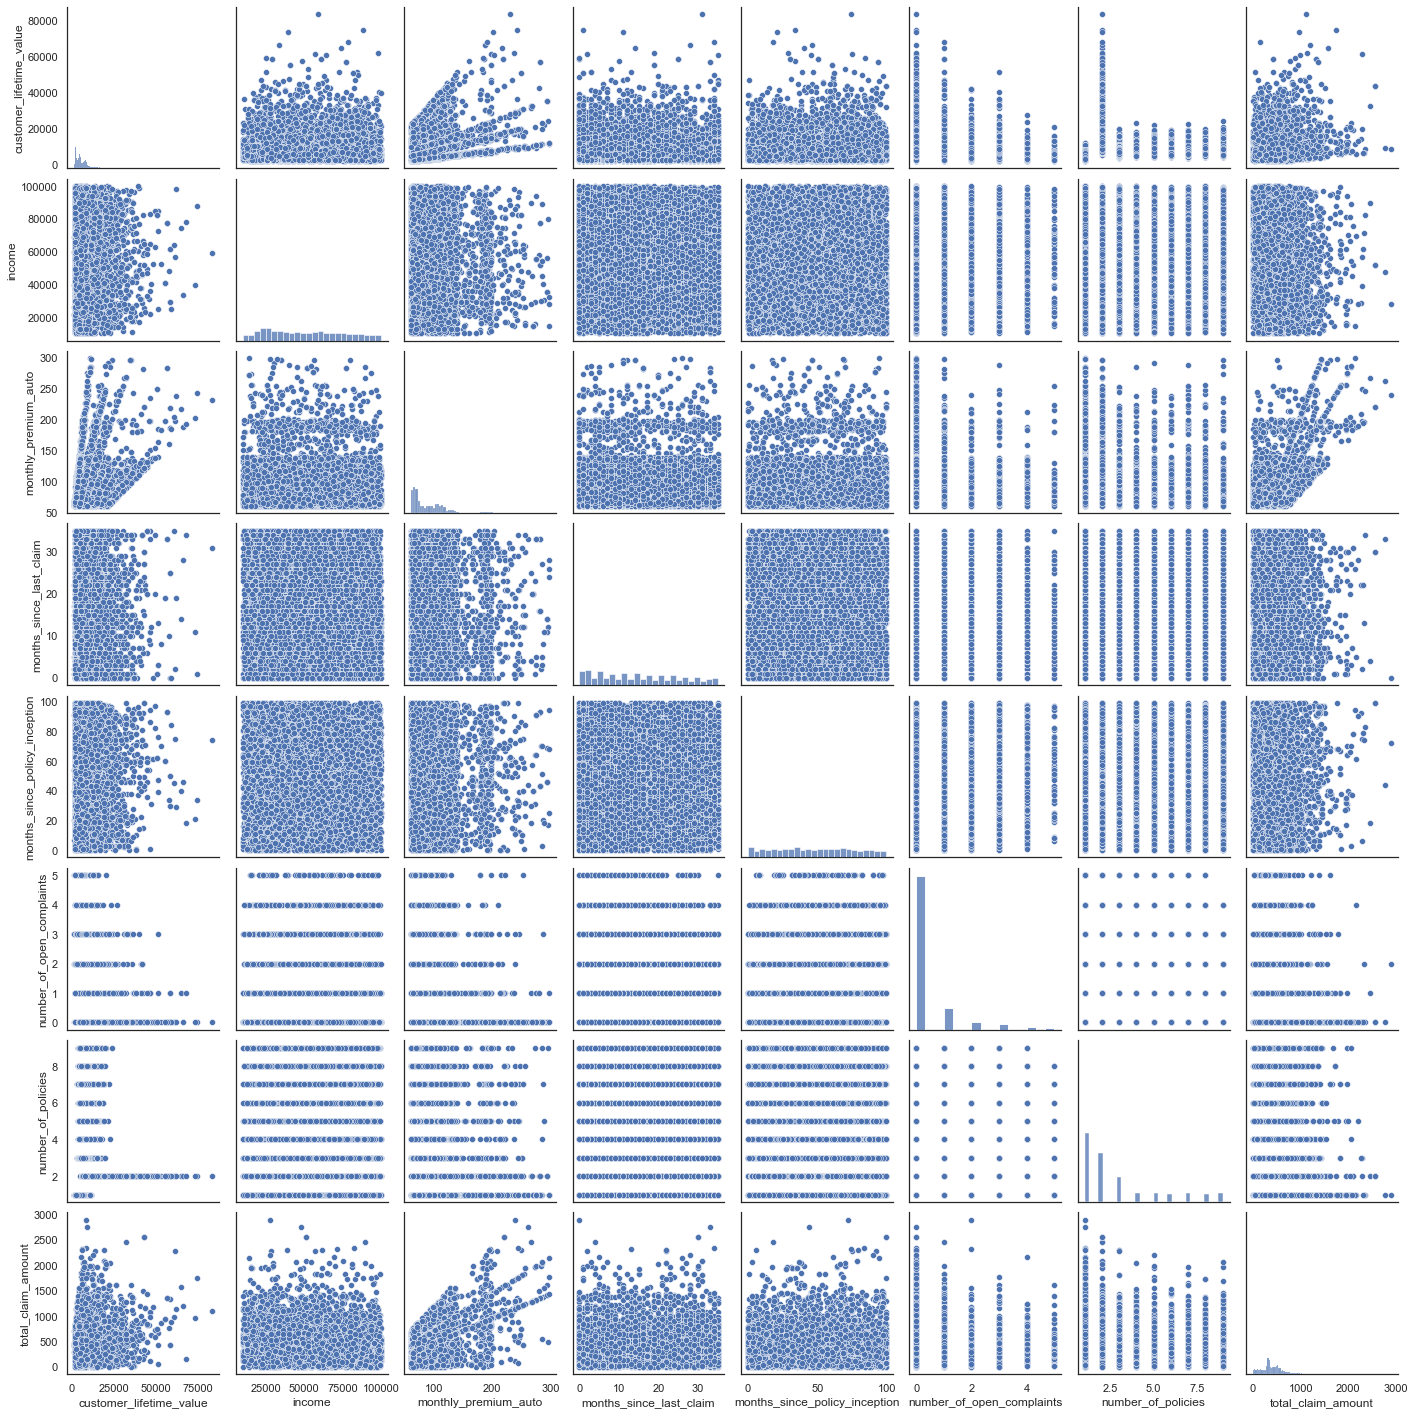

In [33]:
sns.pairplot(numerical)

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

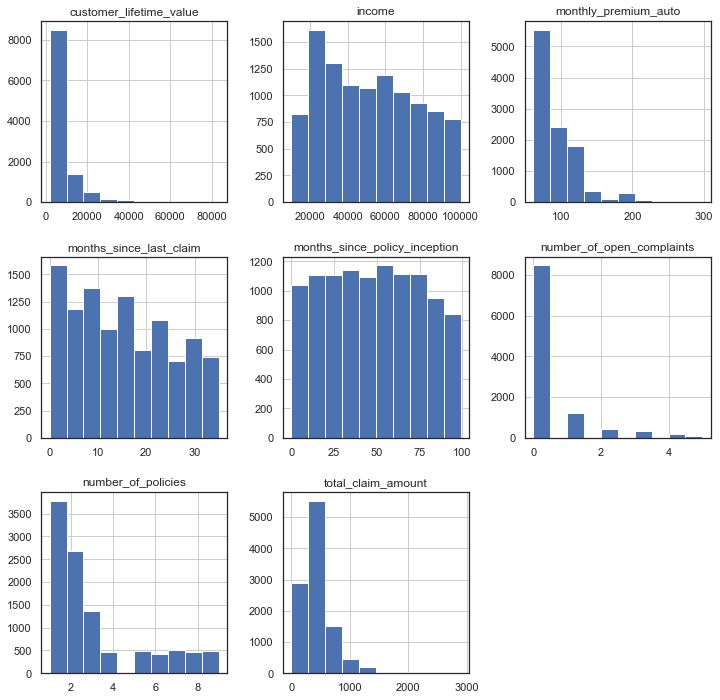

In [34]:
#Distrubition of numerical values in histogram 
numerical.hist(figsize=(12, 12))

## Calculating correlation of the numerical data

In [35]:
#Here's correlation for all the numeric data and the heatmap which can help us to examine the correlation between each values.
numerical.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


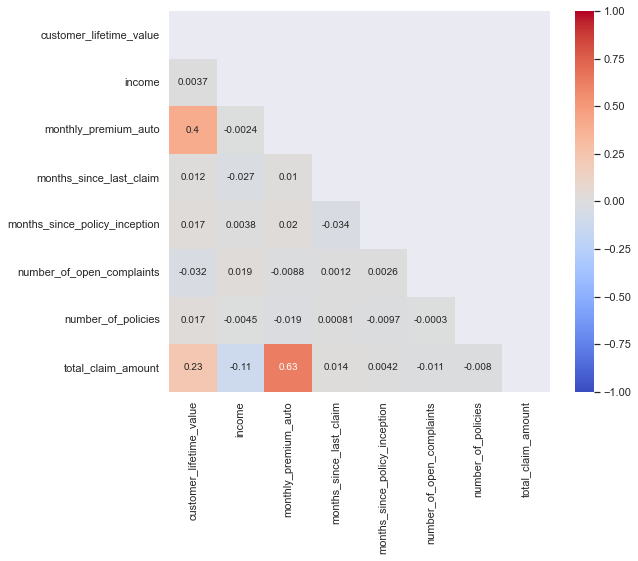

In [36]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

## Target variable :

Total claim amount is our target since we would like to know which type of customer effects total claim amount.

In [37]:
#Total Claim Amount is our target. Here we can see more information about it.
print(df['total_claim_amount'].describe())

count    10689.000000
mean       434.227243
std        292.550878
min          0.000000
25%        269.000000
50%        383.000000
75%        547.000000
max       2893.000000
Name: total_claim_amount, dtype: float64


/Users/esrabecker/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


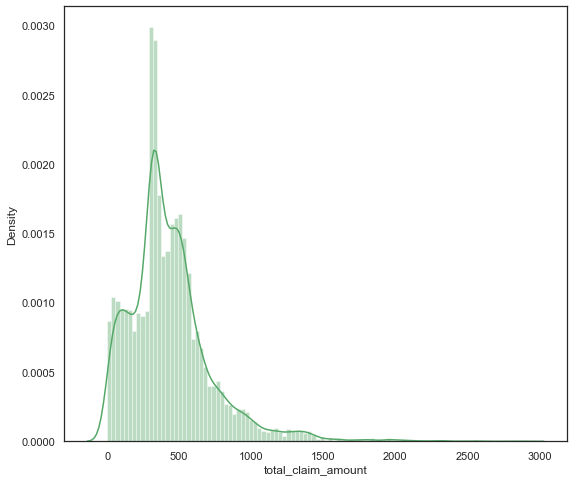

In [38]:
#Distrubition of total claim amount
plt.figure(figsize=(9, 8))
sns.distplot(df['total_claim_amount'], color='g', bins=100, hist_kws={'alpha': 0.4});

### Correlation of total claim amount

Here we can see which values are more correlated to our total claim amount. 

In [39]:
import operator

individual_features_df = []
for i in range(0, len(numerical.columns) - 1): 
    tmpDf = numerical[[numerical.columns[i], 'total_claim_amount']]
    tmpDf = tmpDf[tmpDf[numerical.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['total_claim_amount'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

         income: -0.11122106125728325
number_of_policies: -0.008018893616695447
months_since_policy_inception: 0.004654190716127869
months_since_last_claim: 0.012635300264913973
number_of_open_complaints: 0.021077401408772806
customer_lifetime_value: 0.23284924398032492
monthly_premium_auto: 0.6301486243480394


In [40]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with total_claim_amount:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with total_claim_amount:
['monthly_premium_auto']


- We found that there's only one value which is strongly correlated with total claim amount which is monthly premium auto. So we can see on the scatterplot the linear points of them as well.

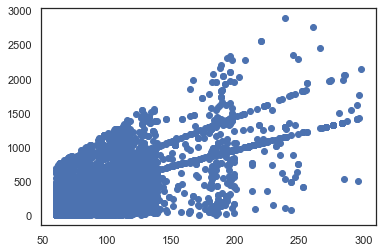

In [52]:
#Show a plot of the response by income
plt.scatter(x=numerical['monthly_premium_auto'], y=numerical['total_claim_amount'])
plt.show()

## Activity 4 (Thursday)
- Show a plot of the total number of responses.
- Show a plot of the response by the sales channel.
- Show a plot of the response by the total claim amount.
- Show a plot of the response by income.
- (Optional) Don't limit your creativity! plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
- Plot the Correlation Heatmap.
- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

### Calculate the number of responses 

Here we calculate the number of responses first in order to eximine from which sales channel we got the most result.

In [41]:
#Show a plot of the total number of responses
responses = categorical["response"].value_counts()
responses

no     9316
yes    1373
Name: response, dtype: int64

Text(0, 0.5, '#response')

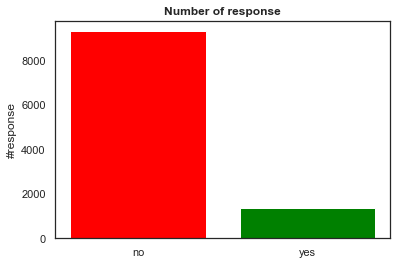

In [42]:
# create figure and axes
plt.bar(responses.index, responses, color=('red','green'))
# set title
plt.title('Number of response', fontweight='bold')
plt.xticks(ticks=[0,1],labels=["no","yes"])
plt.ylabel("#response")

### Sales channels

After calculating the number of responses now let's take a look at the sales channels. 

In [43]:
#Show a plot of the response by the sales channel
sales_channels = categorical['sales_channel'].value_counts()
sales_channels

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

Text(0, 0.5, '#sales_channel')

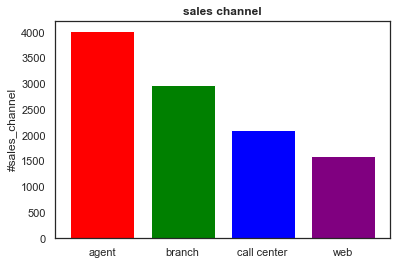

In [44]:
plt.bar(sales_channels.index, sales_channels, color=('red','green', 'blue', 'purple'))
# set title
plt.title('sales channel', fontweight='bold')
plt.xticks(ticks=[0,1,2,3],labels=["agent","branch", "call center", "web"])
plt.ylabel("#sales_channel")

### Numbers of responses by each sales channel

Here finally we can see that the positive response was the most through agent and this followed by the branch.

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

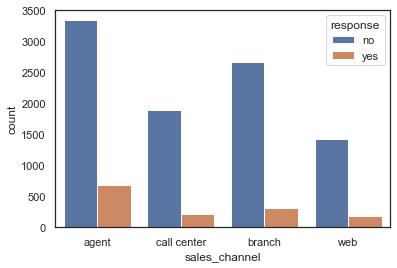

In [45]:
sns.countplot(x =df['sales_channel'], hue = "response", data = df)

### Response by the total claim amount

<AxesSubplot:xlabel='response', ylabel='total_claim_amount'>

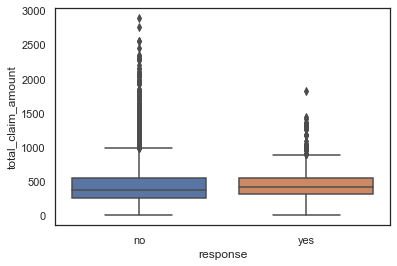

In [46]:
#Show a plot of the response by the total claim amount
# type 2 : boxplot with stripplot
sns.color_palette("hls", 8)
sns.boxplot(x='response', y='total_claim_amount', data=df)

- Also here we can the relationship between total claim amount and customer lifetime value.

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='total_claim_amount'>

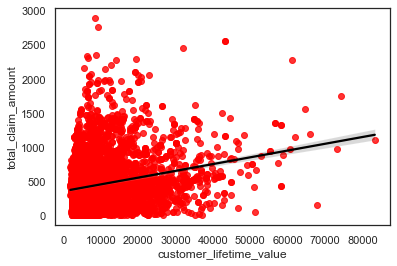

In [54]:
sns.regplot(x='customer_lifetime_value',y='total_claim_amount', data=df, scatter_kws={"color": "red"}, line_kws={"color": "black"})

### Heatmap for categorical dataframe.

In [48]:
categorical_num = pd.get_dummies(categorical, drop_first=True)
categorical_num

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


<AxesSubplot:>

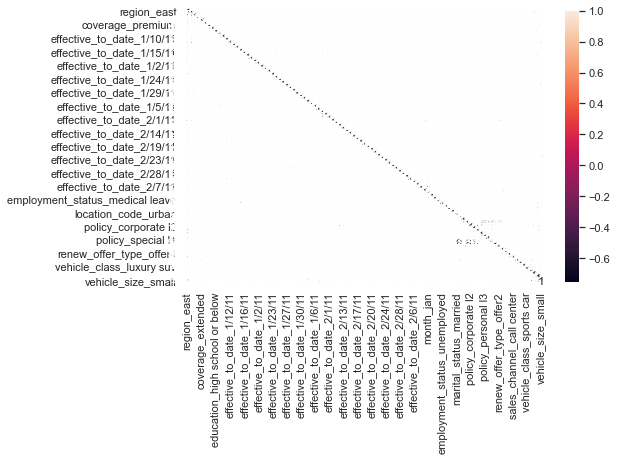

In [21]:
fig= plt.figure(figsize=(8,5))
sns.heatmap(categorical_num.corr(),annot=True)

### Policy Type by Gender

In [56]:
#Policy types 
policy_type =df['policy_type'].value_counts()
policy_type

personal auto     7937
corporate auto    2312
special auto       440
Name: policy_type, dtype: int64

Text(0, 0.5, '#policytype')

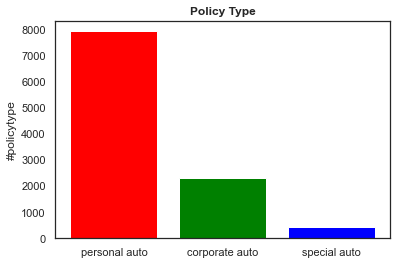

In [57]:
plt.bar(policy_type.index, policy_type, color=('red','green', 'blue', 'purple'))
# set title
plt.title('Policy Type', fontweight='bold')
plt.xticks(ticks=[0,1,2],labels=["personal auto","corporate auto", "special auto"])
plt.ylabel("#policytype")

In [63]:
gender = df['gender'].value_counts()
gender

f    5469
m    5220
Name: gender, dtype: int64

In [64]:
#Now let's combine the policy type
policy_by_gender = df.groupby(['policy_type','gender'])['number_of_policies'].count().reset_index()
policy_by_gender

,policy_type,gender,number_of_policies
0,corporate auto,f,1169
1,corporate auto,m,1143
2,personal auto,f,4063
3,personal auto,m,3874
4,special auto,f,237
5,special auto,m,203


<AxesSubplot:title={'center':'Policy Type by gender'}, xlabel='policy_type', ylabel='number_of_policies'>

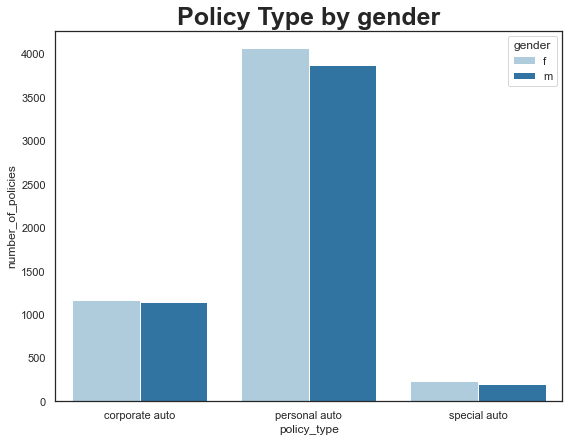

In [69]:
palette = sns.color_palette("Paired")
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Policy Type by gender', size='25', fontweight='bold')

sns.barplot(x = policy_by_gender['policy_type'],y = policy_by_gender['number_of_policies'], hue = policy_by_gender['gender'], palette=palette)

- Here we can see that actually almost in all policy types genders are equal.

### Response by income

Here we can see which income group most likely to answered.

In [71]:
numerical['income'].value_counts()

95697    13
27972    10
60920    10
48567     9
35625     9
         ..
71626     1
36660     1
87050     1
63833     1
68942     1
Name: income, Length: 8210, dtype: int64

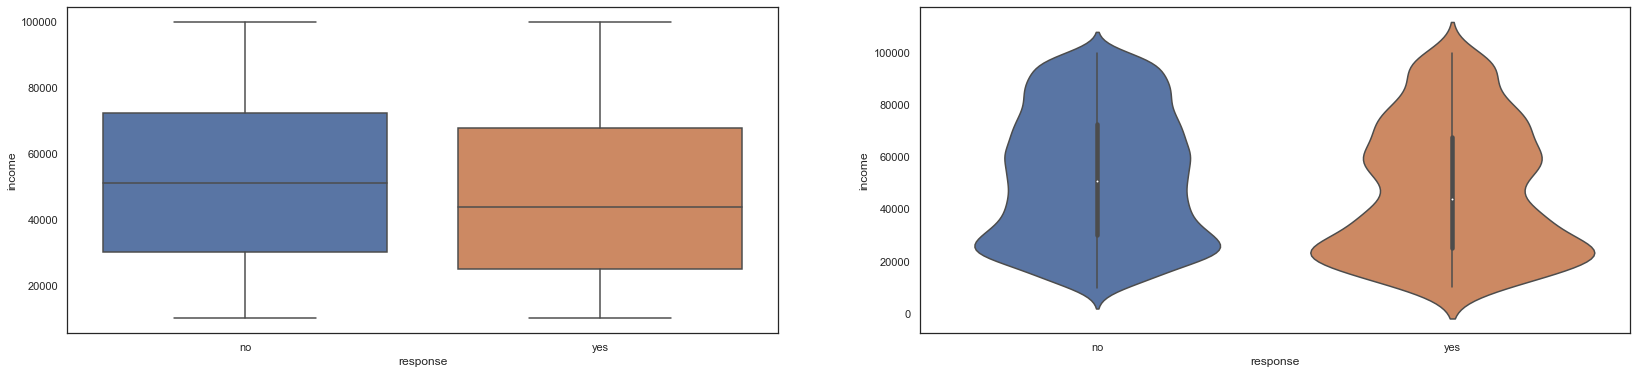

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(28, 6))

# boxplot
sns.boxplot(x='response', y='income', data=df, ax=ax[0])

# violinplot
sns.violinplot(x='response', y='income', data=df, ax=ax[1])

plt.show()